In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# helper functions
import cpt_calculator as cpt

To compute the conditional probability tables, we will obesrve each node in a BFS-like fashion, starting with nodes that do not have parents and then working our way through nodes whose parents we have already observed.

# Depth 0 Nodes Without Parents

In [2]:
print("These are the list of parentless nodes :", cpt.get_parentless_nodes(),". We start by defining a function to reduce redundancy.")

These are the list of parentless nodes : ['DAY_OF_WEEK', 'MONTH'] . We start by defining a function to reduce redundancy.


## 1. Month

In [3]:
month_df = cpt.parentless_CPT('MONTH')
month_df

,MONTH,prob,log_p
0,1,0.064599,-2.739549
1,2,0.037468,-3.284276
2,3,0.046512,-3.068053
3,4,0.063307,-2.759752
4,5,0.082687,-2.492689
5,6,0.108527,-2.220755
6,7,0.127907,-2.056452
7,8,0.120155,-2.118972
8,9,0.118863,-2.129783
9,10,0.093023,-2.374906


## 2. Day of Week

In [4]:
day_of_week_df = cpt.parentless_CPT('DAY_OF_WEEK')
day_of_week_df

,DAY_OF_WEEK,prob,log_p
0,1,0.153747,-1.872448
1,2,0.130491,-2.036451
2,3,0.121447,-2.108277
3,4,0.178295,-1.724318
4,5,0.174419,-1.746297
5,6,0.094315,-2.361112
6,7,0.147287,-1.915373


# Depth 1: Nodes with Parents

First, we find all the nodes whose values we can compute based on those nodes whose conditional probability tables we have already computed.

In [5]:
cpt.available_nodes()

['CRS_ARR_TIME', 'ScheduledArrivalPHL']

## 3. CRS Arrival Time

In [6]:
arr_time_df = cpt.nonparentless_CPT('CRS_ARR_TIME')
arr_time_df.head(10)

Note: There are 158 rows in the above table, but we should have 168 , which means that 10 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,DAY_OF_WEEK,MONTH,CRS_ARR_TIME,prob,log_p
0,1,1,0,0.125000,-2.079442
1,1,1,1,0.875000,-0.133531
2,2,1,0,0.500000,-0.693147
3,2,1,1,0.500000,-0.693147
4,3,1,0,0.142857,-1.945910
5,3,1,1,0.857143,-0.154151
6,4,1,0,0.545455,-0.606136
7,4,1,1,0.454545,-0.788457
8,5,1,0,0.428571,-0.847298
9,5,1,1,0.571429,-0.559616


## 4. ScheduledArrivalPHL

0 represents less than 10, 1 represents less than 20, 2 represents less than 30, 3 represents less than 40, 4 represents less than 50.

In [7]:
scheduled_PHL_df = cpt.nonparentless_CPT('ScheduledArrivalPHL')
scheduled_PHL_df.head(10)

Note: There are 32 rows in the above table, but we should have 35 , which means that 3 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,DAY_OF_WEEK,ScheduledArrivalPHL,prob,log_p
0,1,0,0.655462,-0.422415
1,2,0,0.663366,-0.410428
2,3,0,0.702128,-0.353640
3,4,0,0.659420,-0.416394
4,5,0,0.674074,-0.394415
5,6,0,0.684932,-0.378436
6,7,0,0.666667,-0.405465
7,1,1,0.226891,-1.483287
8,2,1,0.158416,-1.842532
9,3,1,0.234043,-1.452252


# Depth 2

In [8]:
cpt.available_nodes()

['CRS_DEP_TIME']

## 5. CRS Departure Time

In [9]:
departure_time_df = cpt.nonparentless_CPT('CRS_DEP_TIME')
departure_time_df.head(10)

Note: There are 214 rows in the above table, but we should have 336 , which means that 122 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,DAY_OF_WEEK,MONTH,CRS_ARR_TIME,CRS_DEP_TIME,prob,log_p
0,1,1,0,0,2.225074e-308,-708.396419
1,1,1,0,1,1.000000e+00,0.000000
2,1,1,1,0,8.571429e-01,-0.154151
3,1,1,1,1,1.428571e-01,-1.945910
4,2,1,0,0,2.225074e-308,-708.396419
5,2,1,0,1,1.000000e+00,0.000000
6,2,1,1,0,1.000000e+00,0.000000
7,2,1,1,1,2.225074e-308,-708.396419
8,3,1,0,0,2.225074e-308,-708.396419
9,3,1,0,1,1.000000e+00,0.000000


# Depth 3

In [10]:
cpt.available_nodes()

['ScheduledDepartureSFO']

## 6. Number of Scheduled Departures from SFO

In [11]:
scheduled_SFO_df = cpt.nonparentless_CPT('ScheduledDepartureSFO')
scheduled_SFO_df.head(10)

Note: There are 169 rows in the above table, but we should have 1200 , which means that 1031 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,CRS_DEP_TIME,ScheduledArrivalPHL,MONTH,CRS_ARR_TIME,ScheduledDepartureSFO,prob,log_p
0,0,0,1,0,0,2.225074e-308,-708.396419
1,0,0,1,0,1,2.225074e-308,-708.396419
2,0,0,1,0,2,2.225074e-308,-708.396419
3,0,0,1,0,3,2.225074e-308,-708.396419
4,0,0,1,0,4,2.225074e-308,-708.396419
5,0,0,1,1,0,9.523810e-01,-0.048790
6,0,0,1,1,1,2.225074e-308,-708.396419
7,0,0,1,1,2,2.225074e-308,-708.396419
8,0,0,1,1,3,2.225074e-308,-708.396419
9,0,0,1,1,4,4.761905e-02,-3.044522


# Depth 4

In [12]:
cpt.available_nodes()

['LATE_AIRCRAFT_DELAY', 'DelayedDepartureSFO']

## 7. Delayed Departure SFO

In [13]:
delayed_SFO_df = cpt.nonparentless_CPT('DelayedDepartureSFO')
delayed_SFO_df.head(10)

Note: There are 13 rows in the above table, but we should have 50 , which means that 37 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,ScheduledDepartureSFO,ScheduledArrivalPHL,DelayedDepartureSFO,prob,log_p
0,0,0,0,1.000000e+00,0.000000
1,0,0,1,2.225074e-308,-708.396419
2,1,0,0,2.225074e-308,-708.396419
3,1,0,1,2.225074e-308,-708.396419
4,2,0,0,2.225074e-308,-708.396419
5,2,0,1,2.225074e-308,-708.396419
6,3,0,0,2.225074e-308,-708.396419
7,3,0,1,2.225074e-308,-708.396419
8,4,0,0,6.790123e-01,-0.387116
9,4,0,1,3.209877e-01,-1.136353


## 8. Late Aircraft Delay

In [14]:
late_aircraft_delay_df = cpt.nonparentless_CPT('LATE_AIRCRAFT_DELAY')
late_aircraft_delay_df.head(10)

Note: There are 32 rows in the above table, but we should have 40 , which means that 8 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,CRS_DEP_TIME,ScheduledDepartureSFO,CRS_ARR_TIME,LATE_AIRCRAFT_DELAY,prob,log_p
0,0,0,0,0,9.375000e-01,-0.064539
1,0,0,0,1,6.250000e-02,-2.772589
2,0,0,1,0,8.575949e-01,-0.153623
3,0,0,1,1,1.424051e-01,-1.949080
4,1,0,0,0,7.968750e-01,-0.227057
5,1,0,0,1,2.031250e-01,-1.593934
6,1,0,1,0,5.500000e-01,-0.597837
7,1,0,1,1,4.500000e-01,-0.798508
8,0,1,0,0,1.000000e+00,0.000000
9,0,1,0,1,2.225074e-308,-708.396419


# Depth 5

In [15]:
cpt.available_nodes()

['NAS_DELAY']

## 9. NAS Delay

In [16]:
nas_delay_df = cpt.nonparentless_CPT('NAS_DELAY')
nas_delay_df.head(10)

Note: There are 15 rows in the above table, but we should have 16 , which means that 1 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,CRS_DEP_TIME,CRS_ARR_TIME,DelayedDepartureSFO,NAS_DELAY,prob,log_p
0,0,0,0,0,7.894737e-01,-0.236389
1,0,0,0,1,2.105263e-01,-1.558145
2,0,0,1,0,1.000000e+00,0.000000
3,0,0,1,1,2.225074e-308,-708.396419
4,1,0,0,0,6.131687e-01,-0.489115
5,1,0,0,1,3.868313e-01,-0.949767
6,1,0,1,0,6.842105e-01,-0.379490
7,1,0,1,1,3.157895e-01,-1.152680
8,0,1,0,0,6.356784e-01,-0.453063
9,0,1,0,1,3.643216e-01,-1.009718


# Depth 6

In [17]:
cpt.available_nodes()

['WEATHER_DELAY', 'TAXI_IN']

## 10. Taxi In

In [18]:
taxi_in_df = cpt.nonparentless_CPT('TAXI_IN')
taxi_in_df.head(10)

Note: There are 21 rows in the above table, but we should have 104 , which means that 83 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,NAS_DELAY,CRS_ARR_TIME,DelayedDepartureSFO,TAXI_IN,prob,log_p
0,0,0,0,0,9.390244e-01,-0.062914
1,0,0,0,1,5.487805e-02,-2.902642
2,0,0,0,2,6.097561e-03,-5.099866
3,0,0,0,3,2.225074e-308,-708.396419
4,0,0,0,4,2.225074e-308,-708.396419
5,0,0,0,5,2.225074e-308,-708.396419
6,0,0,0,6,2.225074e-308,-708.396419
7,0,0,0,7,2.225074e-308,-708.396419
8,0,0,0,8,2.225074e-308,-708.396419
9,0,0,0,9,2.225074e-308,-708.396419


## 11. Weather Delay

In [19]:
weather_delay_df = cpt.nonparentless_CPT('WEATHER_DELAY')
weather_delay_df.head(10)

,NAS_DELAY,WEATHER_DELAY,prob,log_p
0,0,0,0.997967,-0.002035
1,0,1,0.002033,-6.198479
2,1,0,0.985816,-0.014286
3,1,1,0.014184,-4.255613


# Depth 7

In [20]:
cpt.available_nodes()

['CARRIER_DELAY']

## 12. Carrier Delay

In [21]:
carrier_delay_df = cpt.nonparentless_CPT('CARRIER_DELAY')
carrier_delay_df.head(10)

Note: There are 11 rows in the above table, but we should have 16 , which means that 5 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,CRS_DEP_TIME,CRS_ARR_TIME,WEATHER_DELAY,CARRIER_DELAY,prob,log_p
0,0,0,0,0,8.636364e-01,-0.146603
1,0,0,0,1,1.363636e-01,-1.992430
2,0,0,1,0,2.225074e-308,-708.396419
3,0,0,1,1,2.225074e-308,-708.396419
4,1,0,0,0,6.911197e-01,-0.369442
5,1,0,0,1,3.088803e-01,-1.174801
6,1,0,1,0,1.000000e+00,0.000000
7,1,0,1,1,2.225074e-308,-708.396419
8,0,1,0,0,8.065268e-01,-0.215018
9,0,1,0,1,1.934732e-01,-1.642616


# Depth 8

In [22]:
cpt.available_nodes()

['DEP_DELAY', 'ARR_DEL15']

## 13. Departure Delay

In [23]:
dep_delay_df = cpt.nonparentless_CPT('DEP_DELAY')
dep_delay_df.head(10)

Note: There are 447 rows in the above table, but we should have 2016 , which means that 1569 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,CRS_ARR_TIME,DAY_OF_WEEK,CARRIER_DELAY,MONTH,LATE_AIRCRAFT_DELAY,DEP_DELAY,prob,log_p
0,0,1,0,1,0,0,2.225074e-308,-708.396419
1,0,1,0,1,0,1,2.225074e-308,-708.396419
2,0,1,0,1,0,-1,1.000000e+00,0.000000
3,0,1,0,1,1,0,2.225074e-308,-708.396419
4,0,1,0,1,1,1,2.225074e-308,-708.396419
5,0,1,0,1,1,-1,2.225074e-308,-708.396419
6,0,1,0,2,0,0,2.225074e-308,-708.396419
7,0,1,0,2,0,1,1.000000e+00,0.000000
8,0,1,0,2,0,-1,2.225074e-308,-708.396419
9,0,1,0,2,1,0,2.225074e-308,-708.396419


## 14. Arrival Delay

In [24]:
arr_del15_df = cpt.nonparentless_CPT('ARR_DEL15')
arr_del15_df.head(10)

Note: There are 118 rows in the above table, but we should have 640 , which means that 522 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,CRS_ARR_TIME,CRS_DEP_TIME,ScheduledDepartureSFO,CARRIER_DELAY,LATE_AIRCRAFT_DELAY,NAS_DELAY,DelayedDepartureSFO,ARR_DEL15,prob,log_p
0,0,0,0,0,0,0,0,0,1.000000e+00,0.000000
1,0,0,0,0,0,0,0,1,2.225074e-308,-708.396419
2,0,0,0,0,0,0,1,0,2.225074e-308,-708.396419
3,0,0,0,0,0,0,1,1,2.225074e-308,-708.396419
4,0,0,0,0,0,1,0,0,2.225074e-308,-708.396419
5,0,0,0,0,0,1,0,1,1.000000e+00,0.000000
6,0,0,0,0,0,1,1,0,2.225074e-308,-708.396419
7,0,0,0,0,0,1,1,1,2.225074e-308,-708.396419
8,0,0,0,0,1,0,0,0,2.225074e-308,-708.396419
9,0,0,0,0,1,0,0,1,1.000000e+00,0.000000


# Testing Some Values

In [25]:
def find_logp(obs, df):
    on_li = df.columns.tolist()[:-2]
    return pd.merge(df, obs, on=on_li, how='inner').iloc[0].log_p

def compute_probability(obs):
    dfs = [month_df, day_of_week_df, arr_time_df, scheduled_PHL_df, departure_time_df, scheduled_SFO_df, \
          delayed_SFO_df, late_aircraft_delay_df, nas_delay_df, taxi_in_df, weather_delay_df, carrier_delay_df, \
          dep_delay_df,arr_del15_df]
    vals = [find_logp(obs, df) for df in dfs]
    return np.exp(sum(vals))

In [26]:
test_df = pd.read_csv('./test_data.csv')
y_test = pd.DataFrame(test_df.ARR_DEL15.astype('int', copy=False)).astype(int)
y_test['probability'] = [compute_probability(pd.DataFrame(test_df.iloc[i].transpose()).transpose()) \
                         for i in range(test_df.shape[0])]

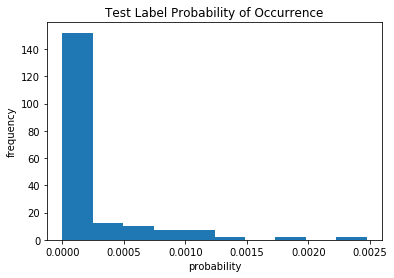

In [27]:
plt.hist(y_test.probability)
plt.xlabel('probability')
plt.ylabel('frequency')
plt.title('Test Label Probability of Occurrence')
plt.savefig('probability_histogram.png')
plt.show()

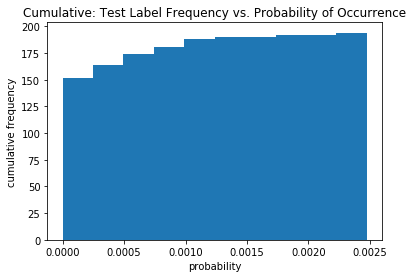

In [28]:
plt.hist(y_test.probability,cumulative=True)
plt.xlabel('probability')
plt.ylabel('cumulative frequency')
plt.title('Cumulative: Test Label Frequency vs. Probability of Occurrence')
plt.savefig('probability_histogram_cumulative.png')
plt.show()

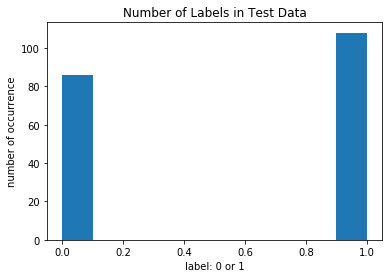

In [29]:
plt.hist(y_test.ARR_DEL15)
plt.xlabel('label: 0 or 1')
plt.ylabel('number of occurrence')
plt.title('Number of Labels in Test Data')
plt.savefig('label_histogram.png')
plt.show()